# Ford GoBike Trip Data Explanatory Analysis
## by Aubrey Hansen-Barkun

## Investigation Overview

The objective of this analysis is to provide an in-depth, polished analysis and visualization of certain features of interest in the Ford GoBike Trip Data dataset.

## Dataset Overview

The 'Ford GoBike Trip Data' dataset contains information about customer trips in 2017. The dataset contains 519,700 observations of 13 features related to the time/duration of the trips, the location of the trip, and characteristics of the bike used and customer. 

In [88]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [23]:
df = pd.read_csv('../2017-fordgobike-tripdata.csv', parse_dates = ['start_time', 'end_time'])

## Trip Duration Distribution

First, we can observe that the distribution of trip durations are highly skewed to the right. By performing a log scale transformation, we see that the distribution is roughly log-normal. However, the mean is still not aligned with the mode, implying that the distribution is still right-skewed.

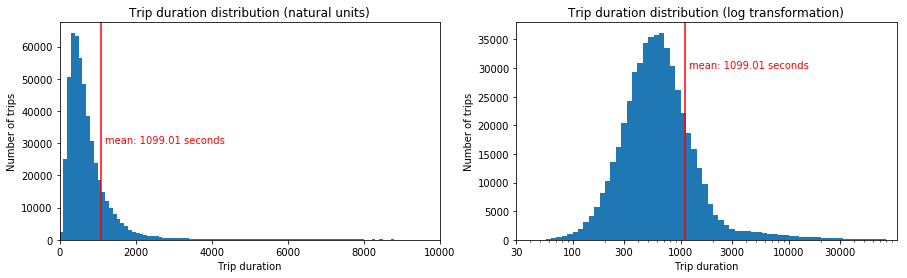

In [26]:
# Setting the figure
fig = plt.figure(figsize=[15,4])

# Plotting the histogram of the natural units
plt.subplot(1,2,1)
bins_dura_reg = np.arange(1, df['duration_sec'].max(), 100)
plt.hist(df['duration_sec'], bins=bins_dura_reg)
plt.xlim(0,10000) # Cut off to focus on concentration of points 
plt.axvline(df['duration_sec'].mean(), c='r')
plt.text(df['duration_sec'].mean()+100,30000,'mean: {:0.2f} seconds'.format(df['duration_sec'].mean()), color='r')
plt.title("Trip duration distribution (natural units)")
plt.xlabel("Trip duration (seconds)")
plt.ylabel("Number of trips")

# Plotting the histogram with a log scale axis transformation
plt.subplot(1,2,2)
bins_dura_log = 10**np.arange(1, np.log10(df['duration_sec'].max()), 0.05)
plt.hist(df['duration_sec'], bins=bins_dura_log)
plt.xscale('log')
ticks_dura = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000] 
plt.xticks(ticks_dura, ticks_dura) 
plt.xlim(30, 100000) 
plt.axvline(df['duration_sec'].mean(), c='r')
plt.text(df['duration_sec'].mean()+100,30000,'mean: {:0.2f} seconds'.format(df['duration_sec'].mean()), color='r')
plt.title("Trip duration distribution (log transformation)")
plt.xlabel("Trip duration (seconds)")
plt.ylabel("Number of trips");

## Trip Duration vs Start Time

Next, we can observe that the mean trip duration per start time seems to be inversely related to the number of trips during the start time block. Indeed, peak mean start time appears to be in the early morning hours, while that time block accounts for a small share of total trips. Conversely, the peak number of trips are started just before and just after working hours, though these trips are also the shortest.

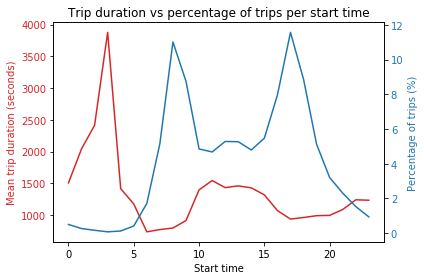

In [107]:
# Create a dataset to compare percentage of trips and mean trip duration with start time
df_dur = df[['start_time', 'duration_sec']]
df_dur['start_time'] = df_dur['start_time'].dt.hour
perc = lambda x: 100*x.count()/df.shape[0]
df_dur2 = pd.pivot_table(data=df_dur, values='duration_sec', index='start_time', aggfunc=('mean', perc)).reset_index()
df_dur2.rename(columns={'<lambda>':'percentage'}, inplace=True)

# Create single plot to highlight trip duration and percentage of trips per start time
fig, ax1 = plt.subplots()
plt.title("Trip duration vs percentage of trips per start time")

# Ax1
color = 'tab:red'
ax1.set_xlabel('Start time')
ax1.set_ylabel('Mean trip duration (seconds)', color=color)
ax1.plot(df_dur2['start_time'], df_dur2['mean'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

# Ax2
color = 'tab:blue'
ax2.set_ylabel('Percentage of trips (%)', color=color)  
ax2.plot(df_dur2['start_time'], df_dur2['percentage'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout();

# Source: https://matplotlib.org/gallery/api/two_scales.html

## Trip Duration vs Day Type

Another variable which imapacts the trip duration is the day on which the trip was conducted. Specifically, trips made on weekdays have a very different mean duration than trips made on weekends.

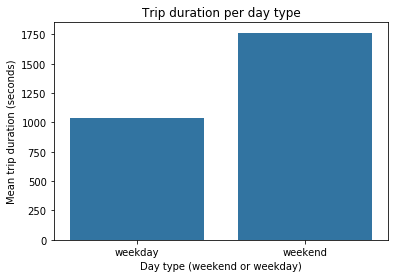

In [109]:
# Create a dataframe to easily create a barplot
df_dur3 = df[['start_time', 'duration_sec']]
df_dur3['day_type'] = df_dur3['start_time'].apply(lambda x: "weekend" if x.weekday() in [6,7] else "weekday")
df_dur4 = df_dur3.groupby('day_type').mean().reset_index()

# Create the visualization
blue=sns.color_palette()[0]
sns.barplot(data=df_dur4, x='day_type', y='duration_sec', color=blue)
plt.title('Trip duration per day type')
plt.xlabel('Day type (weekend or weekday)')
plt.ylabel('Mean trip duration (seconds)');

In [122]:
# Please use the following command in the terminal to view the slide show

!jupyter nbconvert Ford-GoBike_slide-deck.ipynb --to slides --post serve --template output_toggle.tpl